In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/data/TMP_SIAP_pravi.xlsx"
import pandas as pd
documents_df = pd.DataFrame()
data = []
for i in range(1,11):
  df = pd.read_excel(path, str(i))
  data.extend(df.values.tolist())

In [ ]:
ds = [row[3] for row in data]

In [ ]:
srb_ds = [row[1] for row in data]

In [ ]:
srb_ds[0]

'Желим делић стрпљења и смирености које има @cunnin6 док објашњава око вакцине и вируса...'

In [ ]:
!pip install emoji

import re
import emoji
from nltk.corpus import wordnet
import nltk
from gensim import corpora, models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer

     |████████████████████████████████| 175 kB 7.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=a849cf0c70641504c24fe50ddf72bf56966345c5e1a6c2eabe6eb1f54a46a7dc
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def preprocess_data(text):
  try:
    text = re.sub('@\S+', '', text) #remove @user
    text = re.sub('https?://\S+', '', text) #remove links
    text = re.sub(r'([^\w\s,])', r'\1 ', text) #add space after emoji
    text = emoji.demojize(text) #replace emoji with word
    text = re.sub('[^a-zA-Z ]', '', text) #remove punctuation marks and special chars
    text = re.sub('\s+', ' ', text) #replace multiple spaces with one
    text = text.lower().strip() #to lower case and trim
  except Exception as e:
    return ""
  return text


def get_tokenized_text(text):
  final_words = []
  text = word_tokenize(text) #tokenize
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer(language='english')
  for word in text:
        if word not in stopwords.words('english'): #remove stopwords
            lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(word)) #lemmatize with part of speach tag
            stemmed_word = stemmer.stem(lemmatized_word)
            final_words.append(stemmed_word)
  return final_words

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def get_tokenized_corpus(text):
  preprocessed_text = preprocess_data(text)
  tokenized_text = get_tokenized_text(preprocessed_text)
  return tokenized_text

In [ ]:
ds_preprocessed = []

for i in range(len(ds)):
  ds_preprocessed.append(get_tokenized_corpus(ds[i]))

ds_preprocessed

In [ ]:
import csv
import pandas as pd
import numpy as np
import re
import emoji
from nltk.corpus import wordnet
import nltk
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
from nltk.stem import WordNetLemmatizer, SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
!pip install gensim==4.1.2

     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pickle

nmf = pickle.load(open("/content/drive/MyDrive/data/nmf_tfidf_042.p", "rb"))
dictionary = pickle.load(open("/content/drive/MyDrive/data/nmf_tfidf_dictionary_042.p", "rb"))

In [ ]:
from gensim.models import CoherenceModel, LdaModel, TfidfModel

In [ ]:
corpus = [dictionary.doc2bow(text) for text in ds_preprocessed]

In [ ]:
topics = nmf[TfidfModel(dictionary=dictionary)[corpus]]

In [ ]:
topics_best_score = [sorted(t, key=lambda t: t[1]) for t in topics]


In [ ]:
#topics_for_docs = [tr[-2:-1] if (len(tr) != 0) else None for tr in topics_best_score]
#topics_for_docs

In [ ]:
map_topics = {
  0 : "Informativna",
  1 : "Geopolitcka",
  2 : "Proizvodjaci",	
  3 : "Imunizacija",
  4 : "Odgovornost",	
  5 : "Prepricavanje",	
  6 : "Doze",
  7 : "Humor"
}

In [ ]:
def convert_int_to_class(num):
  if num == 2:
    return "positive"
  elif num == 1:
    return "neutral or mixed"
  else:
    return "negative"

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU

In [ ]:
modelv5l = Sequential()
modelv5l.add(Dense(256, input_dim=768))
modelv5l.add(LeakyReLU(alpha=0.05))

modelv5l.add(Dropout(0.2))
modelv5l.add(Dense(128))
modelv5l.add(LeakyReLU(alpha=0.05))

modelv5l.add(Dropout(0.2))
modelv5l.add(Dense(64))
modelv5l.add(LeakyReLU(alpha=0.05))

modelv5l.add(Dropout(0.2))
modelv5l.add(Dense(32))
modelv5l.add(LeakyReLU(alpha=0.05))

modelv5l.add(Dropout(0.2))
modelv5l.add(Dense(16))
modelv5l.add(LeakyReLU(alpha=0.05))

modelv5l.add(Dropout(0.2))
modelv5l.add(Dense(3, activation='softmax'))

In [ ]:
loaded_model = keras.models.load_model("/content/drive/MyDrive/data/mlp/mbn/best_mbn_5_layers", custom_objects={"CustomModel": modelv5l})

In [ ]:
import pandas as pd

df = pd.DataFrame(ds)

In [ ]:
import os

bert_embeddings_pickle_path = "/content/drive/MyDrive/data/bertEmbeddings/DistilBertTransfer"
embeddings = []
labels = []

for root, dirs, files in os.walk(bert_embeddings_pickle_path, topdown=False):
  for name in files:
    path = os.path.join(root, name)
    bert_pickle = pickle.load(open(path, "rb"))
    #print(len(bert_pickle['embeddings']))
    embeddings.extend(bert_pickle['embeddings'])
    start = bert_pickle['start']
    end = bert_pickle['end']
    l = df.values[start:end]
    labels.extend(l)

In [ ]:
embeddings[0]


In [ ]:
val_pred_v1 = modelv5l.predict(np.array(embeddings), verbose=1)
val_pred_v1

4663/4663 [==============================] - 10s 2ms/step


array([[0.38362598, 0.30008775, 0.31628627],
       [0.35694718, 0.30841923, 0.3346336 ],
       [0.36548817, 0.29625857, 0.3382533 ],
       ...,
       [0.36522406, 0.2983895 , 0.3363864 ],
       [0.36431924, 0.31621024, 0.3194705 ],
       [0.35608873, 0.28903297, 0.35487828]], dtype=float32)

In [ ]:
pred = np.argmax(val_pred_v1, axis=1)

In [ ]:
val_pred_v1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
f = open("/content/drive/MyDrive/data/results/initial_results.txt", "a")

for t in range(len(ds)):
  output = ""
  if len(str(ds[t])) != 0:
    if len(topics_best_score[t]) == 0:
      continue
    top =  map_topics[topics_best_score[t][-1][0]]
    output += top
    output += "\t"
    if top == "Humor" or top == "Doze":
      output += "\t"
  else:
    output += "Nepoznat"
    output += "\t\t\t"
  sent = convert_int_to_class(pred[t])
  output += sent
  if sent != "neutral or mixed":
    output += "\t"
  output += "\t"
  output += str(srb_ds[t])
  output += '\n'
  f.write(output)

In [ ]:
topics_for_docs = [tr[-2:-1] if (len(tr) != 0) else None for tr in topics_best_score]
topics_for_docs

[[(4, 0.387270625954314)],
 [(7, 0.17557382200846855)],
 [(7, 0.2025972953048589)],
 [(0, 0.1352109719886965)],
 [(3, 0.2919980946924046)],
 [(1, 0.2675130853061506)],
 [(7, 0.1818554486547935)],
 [(5, 0.20330174420158056)],
 [(7, 0.020133462389804603)],
 [(7, 0.18807024510062875)],
 [(1, 0.22129715827101426)],
 [(2, 0.18258854948605763)],
 [(3, 0.13564248252073025)],
 [(5, 0.25897834041779416)],
 [(3, 0.41354783519368293)],
 [(0, 0.22758990378726668)],
 [(0, 0.21617029616841743)],
 [(7, 0.2548557886194601)],
 [(4, 0.431389448644466)],
 [(4, 0.30233663194085386)],
 [(1, 0.31377181095023626)],
 [(4, 0.18359987301681904)],
 [(4, 0.37442912469461603)],
 [(4, 0.1853349058786591)],
 [(4, 0.33238344436761846)],
 [(1, 0.31098922273864926)],
 [(3, 0.14031584256389668)],
 [(1, 0.3714994373332631)],
 [(3, 0.26283172727333304)],
 [(1, 0.3444772965855715)],
 [(3, 0.22829405552294404)],
 [(1, 0.24349638579058616)],
 [(3, 0.36439087525732056)],
 [(1, 0.31213976107790287)],
 [(2, 0.1621879551589641)]

In [ ]:
freq = [0, 0, 0, 0, 0, 0, 0, 0]

for t in range(len(topics_for_docs)):
  #try:
  if topics_for_docs[t] != None:
    if len(topics_for_docs[t]) != 0:
      freq[topics_for_docs[t][0][0]] += 1
  #except Exception as e:
  #  print(topics_for_docs[t])

In [ ]:
freq

[12459, 9892, 4305, 12969, 16232, 19786, 1827, 15201]

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


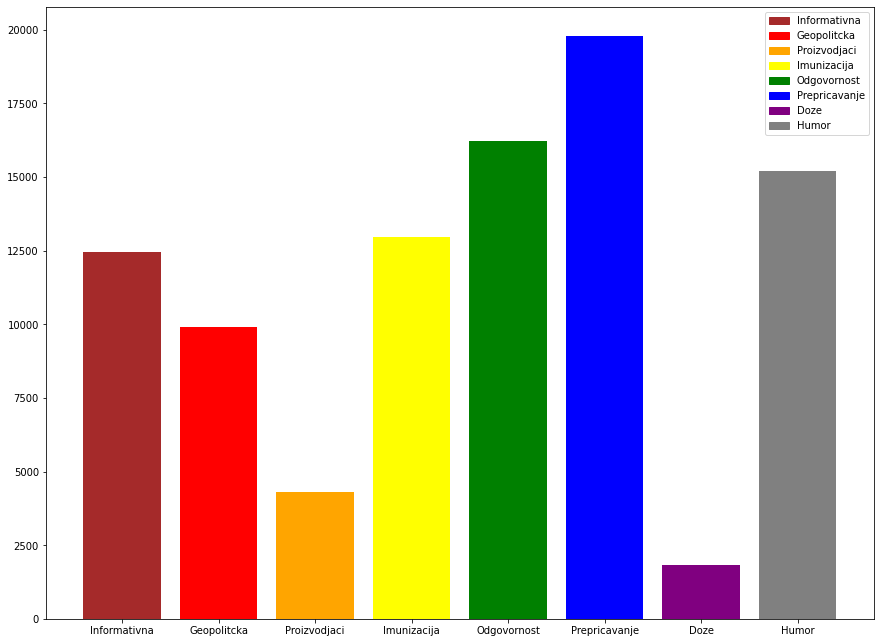

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
import matplotlib.patches as mpatches


plt.rcParams["figure.figsize"] = [11.50, 8.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [map_topics[i] for i in range(8)]

# Get a color map
my_cmap = cm.get_cmap('jet')
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
 
ax.bar(langs, freq, color=['brown', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'grey'])


brown_patch = mpatches.Patch(color='brown', label='Informativna')
red_patch = mpatches.Patch(color='red', label='Geopolitcka')
orange_patch = mpatches.Patch(color='orange', label='Proizvodjaci')
yellow_patch = mpatches.Patch(color='yellow', label='Imunizacija')

green_patch = mpatches.Patch(color='green', label='Odgovornost')
blue_patch = mpatches.Patch(color='blue', label='Prepricavanje')
purple_patch = mpatches.Patch(color='purple', label='Doze')
grey_patch = mpatches.Patch(color='grey', label='Humor')



plt.legend(handles=[brown_patch, red_patch, orange_patch, yellow_patch, green_patch, blue_patch, purple_patch, grey_patch])
#ax.legend(langs, ['brown', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'grey'])

plt.show()

In [ ]:
langs

['Informativna',
 'Geopolitcka',
 'Proizvodjaci',
 'Imunizacija',
 'Odgovornost',
 'Prepricavanje',
 'Doze',
 'Humor']